### **Coffe Sales**

In [119]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams['figure.figsize'] = (4,3)
matplotlib.rcParams['font.size'] = 8

In [120]:
# Import data set
df = pd.read_csv('index.csv')
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [122]:
df.describe()

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


In [123]:
df['card'].isnull().sum()

np.int64(89)

([<matplotlib.patches.Wedge at 0x18f8ab1f1a0>,
 [Text(-1.066674423136347, 0.2687111367746815, 'card'),
  Text(1.0666745106934923, -0.2687107892080235, 'cash')],
 [Text(-0.5818224126198256, 0.14656971096800808, '92.14%'),
  Text(0.5818224603782685, -0.1465695213861946, '7.86%')])

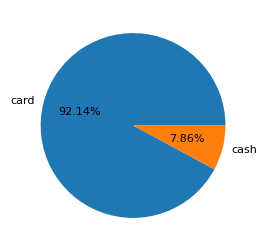

In [124]:
cashtype = df['cash_type'].value_counts()
plt.pie(cashtype , labels= cashtype.index , autopct="%1.2f%%")

#### **Observations : Here 92% people are pay through card and only 8% people are pay with cash.**

In [125]:
df['date'] = pd.to_datetime(df['date'])

In [126]:
df['Day'] = df['date'].dt.strftime('%w')
df['Month'] = df['date'].dt.strftime('%m')
df['Year'] = df['date'].dt.strftime('%Y')

In [127]:
df.head()

,date,datetime,cash_type,card,money,coffee_name,Day,Month,Year
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,5,03,2024
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,5,03,2024
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,5,03,2024
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,5,03,2024
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,5,03,2024


In [128]:
df['coffee_name'].value_counts()

coffee_name
Americano with Milk    268
Latte                  243
Cappuccino             196
Americano              169
Cortado                 99
Hot Chocolate           74
Espresso                49
Cocoa                   35
Name: count, dtype: int64

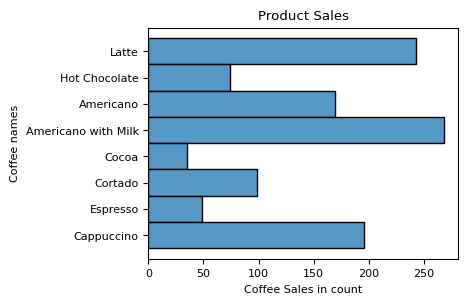

In [129]:
sns.histplot(y=df['coffee_name'])
plt.xlabel("Coffee Sales in count")
plt.ylabel("Coffee names")
plt.title("Product Sales")
plt.show()

#### **Observations: "Americano with milk" is highest saling coffee , and "Cocoa" is lowest saling coffee.**

In [130]:
df[['coffee_name','money']].groupby(['coffee_name','money']).size().reset_index()

,coffee_name,money,0
0,Americano,23.02,30
1,Americano,27.92,72
2,Americano,28.90,53
3,Americano,29.00,8
4,Americano,30.00,6
5,Americano with Milk,27.92,55
6,Americano with Milk,32.82,147
7,Americano with Milk,33.80,51
8,Americano with Milk,34.00,7
9,Americano with Milk,35.00,8


In [131]:
df['cash_type'].value_counts()
# df.head()

cash_type
card    1044
cash      89
Name: count, dtype: int64

<Axes: xlabel='cash_type', ylabel='Count'>

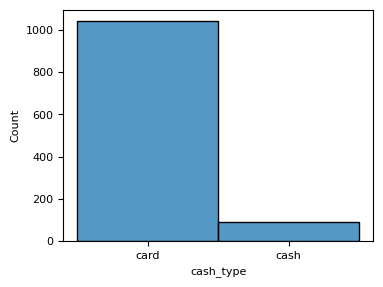

In [132]:
sns.histplot(df['cash_type'])

In [133]:
month_sales = df['Month'].value_counts().reset_index()

In [134]:
month_sales.head()

,Month,count
0,05,267
1,07,237
2,06,227
3,03,206
4,04,196


<Axes: xlabel='Month', ylabel='count'>

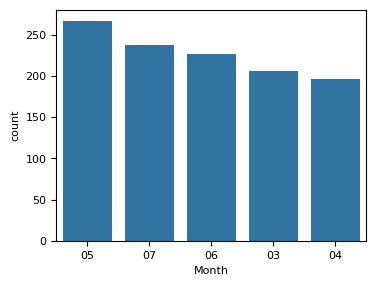

In [135]:
sns.barplot(x = 'Month' , y = "count" , data=month_sales)

#### **Obsevations : Highest sales in "May" month**

In [136]:
df.head()

,date,datetime,cash_type,card,money,coffee_name,Day,Month,Year
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,5,03,2024
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,5,03,2024
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,5,03,2024
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,5,03,2024
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,5,03,2024


- **Revenue**
- **Day wise sales -> m,t,w,t**
- 

In [137]:
weekday_sales = df.groupby('Day').count()['date'].reset_index().rename(columns={'date':'count'})
weekday_sales

,Day,count
0,0,151
1,1,151
2,2,185
3,3,165
4,4,164
5,5,163
6,6,154


Text(0, 0.5, 'Count of Coffee Sales')

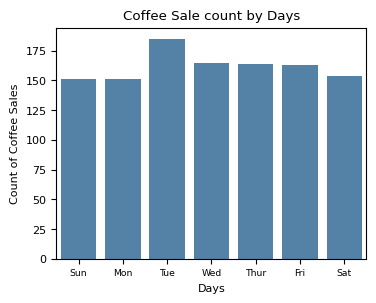

In [138]:
# plt.figure(figsize=(12,6))
sns.barplot(data=weekday_sales,x='Day',y='count',color='steelblue')
plt.xticks(range(len(weekday_sales['Day'])),['Sun','Mon','Tue','Wed','Thur','Fri','Sat'],size='small')
plt.title("Coffee Sale count by Days")
plt.xlabel("Days")
plt.ylabel('Count of Coffee Sales')

#### **Revenue by Coffees**

In [139]:
df['money'].sum()

np.float64(37508.880000000005)

In [140]:
revenue = df.groupby('coffee_name').sum('money').reset_index().sort_values('money' , ascending=False)
revenue.head(15)

,coffee_name,money
7,Latte,9009.14
1,Americano with Milk,8601.94
2,Cappuccino,7333.14
0,Americano,4644.54
6,Hot Chocolate,2778.48
4,Cortado,2745.08
3,Cocoa,1295.94
5,Espresso,1100.62


[Text(0, 0, '9009.14'),
 Text(0, 0, '8601.94'),
 Text(0, 0, '7333.14'),
 Text(0, 0, '4644.54'),
 Text(0, 0, '2778.48'),
 Text(0, 0, '2745.08'),
 Text(0, 0, '1295.94'),
 Text(0, 0, '1100.62')]

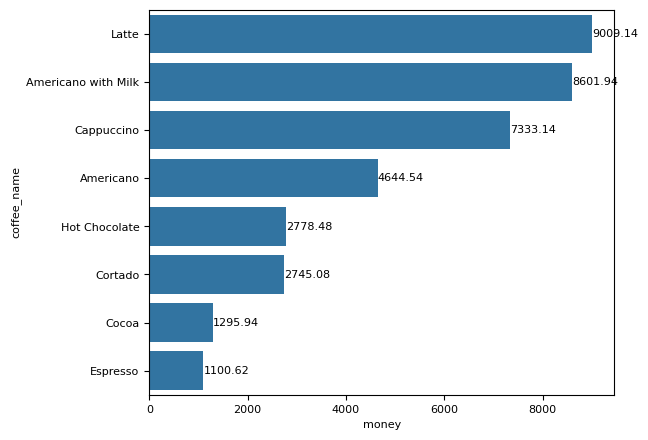

In [141]:
plt.figure(figsize=(6,5))
ax = sns.barplot(y = 'coffee_name' , x='money' , data=revenue)
ax.bar_label(ax.containers[0])

In [ ]:
# machine learning concepts - beginner
    indian ai developer
# statistic concepts - intermediate
